In [16]:
import jax.numpy as np
from jax import random
from jax.scipy.special import expit
import matplotlib.pyplot as plt

from gcdyn.model import Model
from gcdyn.parameters import Parameters

In [17]:
# get random numbers for starting condition of response function parameters
seed = 0
key = random.PRNGKey(seed)
θ = random.normal(key, shape=(4,))
print(θ)

[ 0.08086788 -0.38624702 -0.37565558  1.66897423]


In [18]:
# death rate
μ = 1
# mutation rate
m = 1
# sampling efficiency
ρ = 0.5

params = Parameters(θ, μ, m, ρ)

In [20]:
T = 3
n_trees = 10

model = Model(params)
model.simulate(T, n_trees, seed, 50, 96)
θ_inferred = model.fit()
print(θ_inferred)

initial objective 1.245808e+03
iteration 1000, objective 1.202e+03, relative change 3.713e-08                                                                                                                                                                                                       
maximum iteration 1000 reached with relative change in objective function 3.7e-08
[  0.6304408  -16.48077722   0.92547708   0.46211398]


In [28]:
def λ_(x: float, θ):
    r"""Birth rate of phenotype x

    Args:
        x: phenotype

    Returns:
        float: birth rate
    """
    return θ[0] * expit(θ[1] * (x - θ[2])) + θ[3]

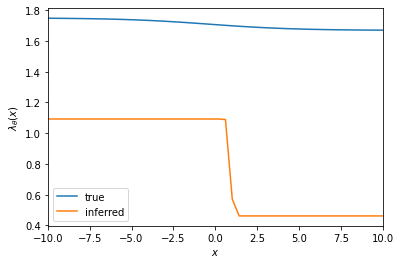

In [29]:
x_array = np.linspace(-10, 10)
plt.figure()
plt.plot(x_array, λ_(x_array, θ), label="true")
plt.plot(x_array, λ_(x_array, θ_inferred), label="inferred")
plt.xlabel(r"$x$")
plt.ylabel(r"$\lambda_\theta(x)$")
plt.xlim(-10, 10)
plt.legend()
plt.show()